In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import scipy
from scipy import constants
from scipy.signal import find_peaks
import pandas as pd
from scipy.signal import argrelextrema
import pylab

FileNotFoundError: [Errno 2] No such file or directory: 'LSMO_1(650C_3mT_0.66f_onSTO100)2th_w_wide_correct.csv'

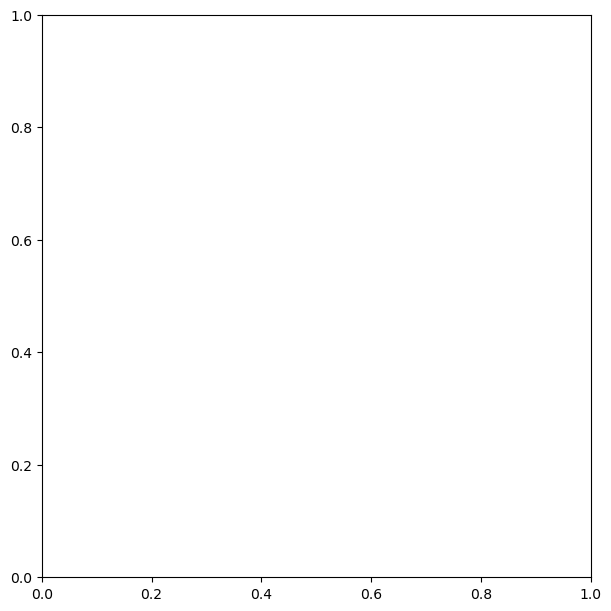

In [23]:
#Main Multi-Series Plotter
#Import csv file(s) by title
series_ticker = ["LSMO_1(650C_3mT_0.66f_onSTO100)2th_w_wide_correct.csv", "LSMO_2(650C_10mT_0.65f_onSTO100)2th_w.csv", "LSMO_3(700C_10mT_0.65f_onSTO100)2th_w_redo.csv", "LSMO_4(600C_10mT_0.65f_onSTO100)2th_w_redo.csv"]
series_labels = ['LSMO1 (650C, 3mT, 0.66 J/cm-2)','LSMO2 (650C, 10mT, 0.65 J/cm-2)', 'LSMO3 (700C, 10mT, 0.65 J/cm-2)', 'LSMO4 (600C, 10mT, 0.65 J/cm-2)']

#corresponds to bulk lattice constant of 3.87A found at 
#https://pubs.aip.org/aip/adv/article/11/12/125115/990678/The-role-of-epitaxial-strain-on-the-electronic-and
peakpos=[46.898, 46.898]
peakline=[0,100000000]

# Plot results
fig, ax = plt.subplots(1, 1, figsize=(6, 6), layout='constrained')
ax.set_prop_cycle(color=['#e81416','#ffa500', '#faeb36','#79c314','#487de7','#4b369d','#70369d'])

    
   #Finer steps in rainbow
    #E81416, '#ff9896','#ff7f0e', '#ffbb78', '#bcbd22', '#dbdb8d', '#2ca02c',
    #'#98df8a','#17becf', '#9edae5','#1f77b4', '#aec7e8',
     #'#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    #'#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7'])
for nn, column in enumerate(series_ticker):
    # Plot each line separately with its own color.
    df = pd.read_csv(series_ticker[nn], skiprows=31)
    line, = ax.plot(df['Angle'],df['Intensity'], label = series_labels[nn])

    #Find peaks
    peaks, points = find_peaks(df['Intensity'], height=1000, distance = 15, prominence=20)
    print('Peak position(s):')
    print(series_ticker[nn])
    print(df.Angle[peaks])
    x= df.Angle[peaks]
    y=df.Intensity[peaks]
    plt.scatter(x, df.Intensity[peaks], c='g',)

plt.plot(peakpos,peakline, linestyle='dashed', color = 'black')
plt.yscale('log')
plt.ylabel('Intensity (a.u.)')
plt.xlabel(r'2$\theta$ Angle (deg)') 
plt.xlim(40, 50)
plt.legend()
plt.show()
#fig.savefig('20240621_LSMOoptimization.png', bbox_inches='tight')

In [24]:
def xrd_simple_plot(file, labelstring, color, prom):
    df = pd.read_csv(file, skiprows=31)

    #Find peaks
    peaks, points = find_peaks(df['Intensity'], height=10, distance = 10, prominence=prom)
    print('Peak position(s):')
    print(df.Angle[peaks])
    x= df.Angle[peaks]
    y=df.Intensity[peaks]
    plt.scatter(x, df.Intensity[peaks], c=color,)

    # Plot results
    plt.plot(df['Angle'],df['Intensity'], label = labelstring)

    plt.yscale('log')
    plt.ylabel('Intensity (a.u.)')
    plt.xlabel(r'2$\theta$ Angle (deg)') 
    plt.legend()

    plt.show()
    ## fig.savefig('title.png', bbox_inches='tight')

In [25]:
def xrd_multi_plot(filelist, labellist, litpeak,litpeaklabel, peakheight, prom, figname, xmin,xmax, colorlist):
    series_ticker = filelist
    series_labels = labellist


    colorlistshort=['#e81416','#ffa500', '#faeb36','#79c314','#487de7','#4b369d','#70369d']
    colorlistlong= ['#E81416', '#ff9896','#ff7f0e', '#ffbb78', '#bcbd22', '#dbdb8d', '#2ca02c',
    '#98df8a','#17becf', '#9edae5','#1f77b4', '#aec7e8',
     '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7']
    
    # Plot results
    fig, ax = plt.subplots(1, 1, layout='constrained')

    if colorlist == 'long':
        ax.set_prop_cycle(color= colorlistlong)
    if colorlist == 'short':
        ax.set_prop_cycle(color= colorlistshort)
    
    
    for nn, column in enumerate(series_ticker):
        # Plot each line separately with its own color.
        df = pd.read_csv(series_ticker[nn], skiprows=31)
        line, = ax.plot(df['Angle'],df['Intensity'], label = series_labels[nn])

        #Find peaks
        peaks, points = find_peaks(df['Intensity'], height=peakheight, distance = 15, prominence=prom)
        print('Peak position(s):')
        print(series_ticker[nn])
        print(df.Angle[peaks])
        x= df.Angle[peaks]
        y=df.Intensity[peaks]
        plt.scatter(x, df.Intensity[peaks], c='grey',)

        for mm, column in enumerate(litpeak):
            peakpos=[litpeak[mm], litpeak[mm]]
            peakline=[0,100000000]
            lines=plt.plot(peakpos,peakline, linestyle='dashed', color = 'black')
            plt.yscale('log')
            plt.xlim(xmin, xmax)
            plt.text(litpeak[mm]-0.25, 1000000, litpeaklabel[mm], rotation=90)
        #for x,y in zip(litpeak,peakline):
                #plt.annotate(litpeaklabel, # this is the text
                #(x,y), # these are the coordinates to position the label
                #textcoords="offset points", # how to position the text
                #xytext=(0,10), # distance from text to points (x,y)
                #ha='center') # horizontal alignment can be left, right or center

    plt.yscale('log')
    plt.ylabel('Intensity (a.u.)')
    plt.xlabel(r'2$\theta$ Angle (deg)') 
    
    plt.legend(loc='best')
    plt.show()
    fig.savefig(figname, bbox_inches='tight')

In [26]:
def file_list_maker(*args):
    str_list = [str(arg) for arg in args]
    return str_list

['LSMO1 (650C, 3mT, 0.66 J/cm-2)', 'LSMO2 (650C, 10mT, 0.65 J/cm-2)', 'LSMO3 (700C, 10mT, 0.65 J/cm-2)', 'LSMO4 (600C, 10mT, 0.65 J/cm-2)', 'LSMO5 (650C, 100mT, 0.65 J/cm-2)', 'LSMO6 (700C, 100mT, 0.65 J/cm-2)', 'LSMO7 (600C, 3mT, 0.65 J/cm-2)', 'LSMO8 (700C, 3mT, 0.65 J/cm-2)', 'LSMO9 (600C, 100mT, 0.65 J/cm-2)']


FileNotFoundError: [Errno 2] No such file or directory: 'LSMO_1(650C_3mT_0.66f_onSTO100)2th_w_wide_correct.csv'

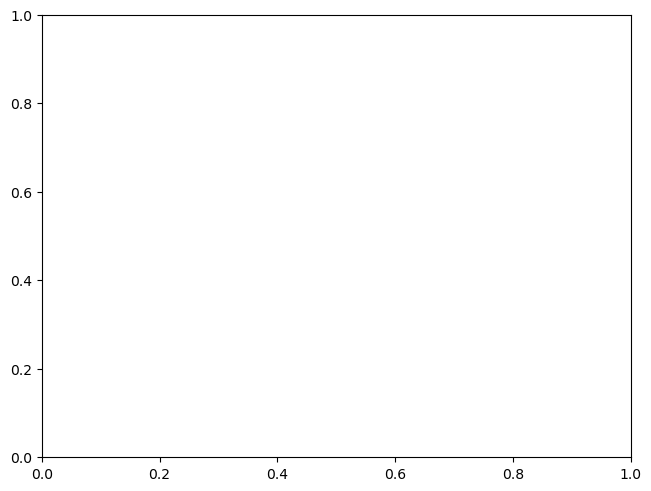

In [12]:
list1= file_list_maker("LSMO_1(650C_3mT_0.66f_onSTO100)2th_w_wide_correct.csv", "LSMO_2(650C_10mT_0.65f_onSTO100)2th_w.csv", "LSMO_3(700C_10mT_0.65f_onSTO100)2th_w_redo.csv", "LSMO_4(600C_10mT_0.65f_onSTO100)2th_w_redo.csv","LSMO_5(650C_100mT_0.65f_onSTO100)2th_w.csv","LSMO_6(700C_100mT_0.65f_onSTO100)2th_w.csv", "LSMO_7(600C_3mT_0.65f_onSTO100)2th_w.csv", "LSMO_8(700C_3mT_0.65f_onSTO100)2th_w.csv", "LSMO_9(600C_100mT_0.65f_onSTO100)2th_w.csv")
list2=file_list_maker('LSMO1 (650C, 3mT, 0.66 J/cm-2)','LSMO2 (650C, 10mT, 0.65 J/cm-2)', 'LSMO3 (700C, 10mT, 0.65 J/cm-2)', 'LSMO4 (600C, 10mT, 0.65 J/cm-2)', 'LSMO5 (650C, 100mT, 0.65 J/cm-2)', 'LSMO6 (700C, 100mT, 0.65 J/cm-2)', 'LSMO7 (600C, 3mT, 0.65 J/cm-2)', 'LSMO8 (700C, 3mT, 0.65 J/cm-2)', 'LSMO9 (600C, 100mT, 0.65 J/cm-2)')
print(list2)
litpeak = [46.898]
litpeaklabel=['  LSMO']
peakheight=600
prom=15

xrd_multi_plot(list1, list2, litpeak, litpeaklabel, peakheight, prom, 'test', 40,50, 'long')


In [13]:
xrd_simple_plot("LSMO_5(650C_100mT_0.65f_onSTO100)XRR.csv", 'LSMO 5 XRR', 'r', 30)

FileNotFoundError: [Errno 2] No such file or directory: 'LSMO_5(650C_100mT_0.65f_onSTO100)XRR.csv'

['LSMO5 (650C, 100mT, 0.65 J/cm-2)', 'LSMO6 (700C, 100mT, 0.65 J/cm-2)']


FileNotFoundError: [Errno 2] No such file or directory: 'LSMO_5(650C_100mT_0.65f_onSTO100)2th_w.csv'

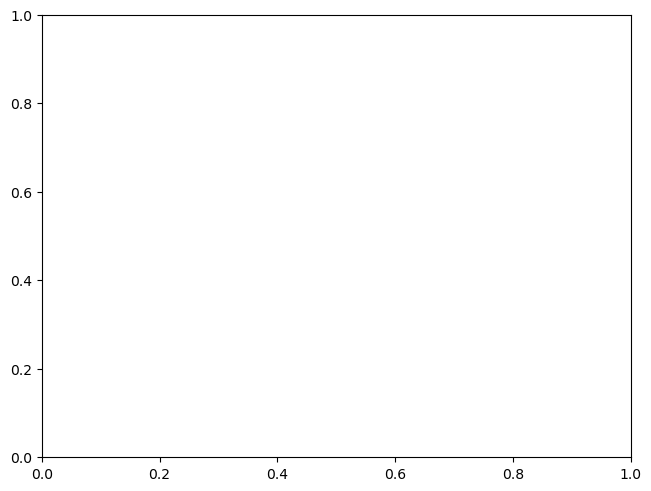

In [14]:
list1= file_list_maker("LSMO_5(650C_100mT_0.65f_onSTO100)2th_w.csv","LSMO_6(700C_100mT_0.65f_onSTO100)2th_w.csv")
list2=file_list_maker('LSMO5 (650C, 100mT, 0.65 J/cm-2)', 'LSMO6 (700C, 100mT, 0.65 J/cm-2)')
print(list2)
litpeak = [46.898]
litpeaklabel=[' LSMO']
peakheight=600
prom=20

xrd_multi_plot(list1, list2, litpeak, litpeaklabel=litpeaklabel, peakheight=peakheight, prom=prom, figname='test', xmin=40,xmax=50, colorlist='short')


['V2O3_1 (500C, 1e-6Torr, 1.75 J/cm-2)', 'V2O3_5 (same cond. with Cr2O3 cap)', 'V2O3_6 (same cond., grind target first)']


FileNotFoundError: [Errno 2] No such file or directory: 'V2O3_no1_(500C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w_correctwide.csv'

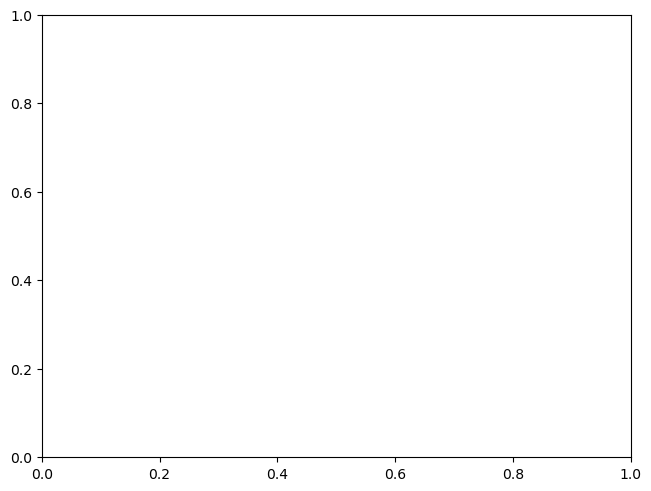

In [15]:
list1= file_list_maker("V2O3_no1_(500C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w_correctwide.csv", "V2O3_no5_(500C, 9e-7Torr,1000pls,Al2O3,1pt7Jcm-2,3000plssameconditionsCr2O3cap)_2th-w_wide.csv", "V2O3_no6_(500C, 1e-6Torr,1000pls,Al2O3,1pt7Jcm-2)_2th-w.csv")
list2=file_list_maker('V2O3_1 (500C, 1e-6Torr, 1.75 J/cm-2)', 'V2O3_5 (same cond. with Cr2O3 cap)', 'V2O3_6 (same cond., grind target first)')
print(list2)
litpeak = [39.717, 38.7]
litpeaklabel= ['VO2(020)', 'V2O3(006)']
peakheight=600
prom=15

litpeak2 = [81.172, 83.096]
litpeaklabel2 = ['V7O3(422)', 'V3O5(800)']

xrd_multi_plot(list1, list2, litpeak,litpeaklabel, peakheight, prom, 'test', 35, 45, 'short')

xrd_multi_plot(list1, list2, litpeak2,litpeaklabel2, peakheight, prom, 'test', 80,95, 'short')

['V2O3_1 (500C, 1e-6Torr, 1.75 J/cm-2)', 'V2O3_2 (600C, 1e-6Torr, 1.75 J/cm-2)', 'V2O3_3 (700C, 1e-6Torr, 1.75 J/cm-2)', 'V2O3_4 (400C, 1e-6Torr, 1.75 J/cm-2)']
Peak position(s):
V2O3_no1_(500C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w_correctwide.csv
833     41.68
3286    90.74
Name: Angle, dtype: float64
Peak position(s):
V2O3_no2_(600C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w.csv
833     41.68
3286    90.74
Name: Angle, dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: 'V2O3_no3_(700C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w.csv'

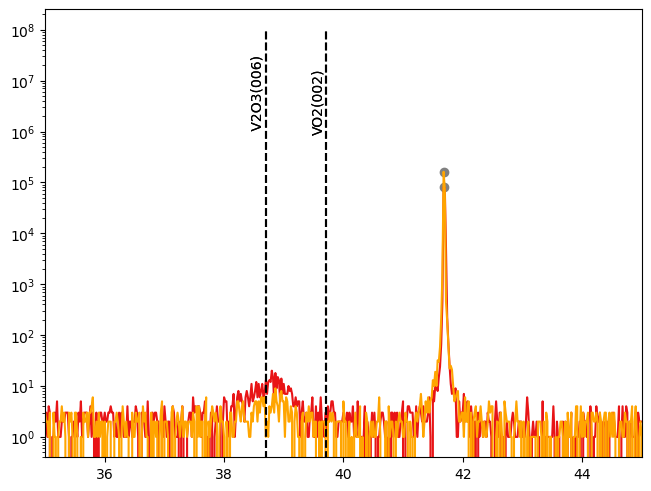

In [29]:
list1= file_list_maker("V2O3_no1_(500C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w_correctwide.csv", "V2O3_no2_(600C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w.csv", "V2O3_no3_(700C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w.csv", "V2O3_no4_(400C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w.csv")
list2=file_list_maker('V2O3_1 (500C, 1e-6Torr, 1.75 J/cm-2)','V2O3_2 (600C, 1e-6Torr, 1.75 J/cm-2)', 'V2O3_3 (700C, 1e-6Torr, 1.75 J/cm-2)', 'V2O3_4 (400C, 1e-6Torr, 1.75 J/cm-2)')
print(list2)
litpeakfull = [38.7, 67.1, 39.717, 64.467, 81.172, 83.096, 67.587, 34.331]
litpeaklabelfull= [ 'V2O3 (006)', ' Pt (220)', 'VO2(002)', 'VO2(130)', 'V7O3(422)', 'V3O5(800)', 'V2O3(361)', 'V205(310)']
peakheight=600
prom=15
litpeak=[38.7, 39.717]
litpeaklabel=[' V2O3(006)', 'VO2(002)']


xrd_multi_plot(list1, list2, litpeak, litpeaklabel, peakheight, prom, 'test', 35,45, 'short')
xrd_multi_plot(list1, list2, litpeakfull, litpeaklabelfull, peakheight, prom, 'test', 35,95, 'short')

['Cr2O3_59 (2 J/cm-2)+5nm Pt', 'Cr2O3_58 (1.5 J/cm-2) +5nm Pt']
Peak position(s):
Cr2O3_059_(600C,6000pls.P20mT,fluence2,STO111+1pt5KplsLSMO+5nmPt)_2th-w.csv
747     39.96
3060    86.22
Name: Angle, dtype: float64
Peak position(s):
Cr2O3_058_(600C,6000pls.P20mT,fluence1pt5,STO111+1pt5KplsLSMO+5nmPt)_2th-w.csv
747     39.96
3060    86.22
Name: Angle, dtype: float64


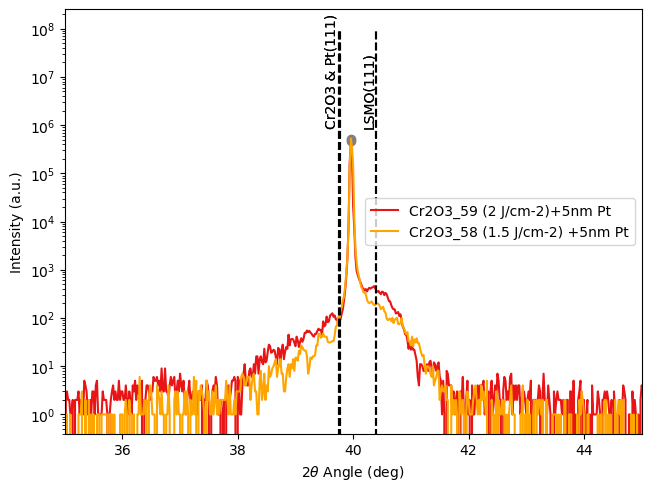

In [17]:
list1= file_list_maker( "Cr2O3_059_(600C,6000pls.P20mT,fluence2,STO111+1pt5KplsLSMO+5nmPt)_2th-w.csv", "Cr2O3_058_(600C,6000pls.P20mT,fluence1pt5,STO111+1pt5KplsLSMO+5nmPt)_2th-w.csv")
list2=file_list_maker('Cr2O3_59 (2 J/cm-2)+5nm Pt', 'Cr2O3_58 (1.5 J/cm-2) +5nm Pt')
print(list2)
litpeakfull = [ 39.75, 40.4, 39.764]
litpeaklabelfull= [ 'Cr2O3 & Pt(111)', 'LSMO(111)','']
peakheight=600
prom=15

xrd_multi_plot(list1, list2, litpeakfull, litpeaklabelfull, peakheight, prom, 'test', 35,45, 'short')

Peak position(s):
V2O3_no1_(500C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w_correctwide.csv
833     41.68
3286    90.74
Name: Angle, dtype: float64
Peak position(s):
V2O3_no12_(500C, 1mT Ar,1000pls,Al2O3,3pt1Jcm-2)_2th-w_wide.csv
308    41.68
Name: Angle, dtype: float64
Peak position(s):
V2O3_no9_(500C, 20mT Ar,1000pls,Al2O3,2Jcm-2)_2th-w_narrow.csv
308    41.68
Name: Angle, dtype: float64


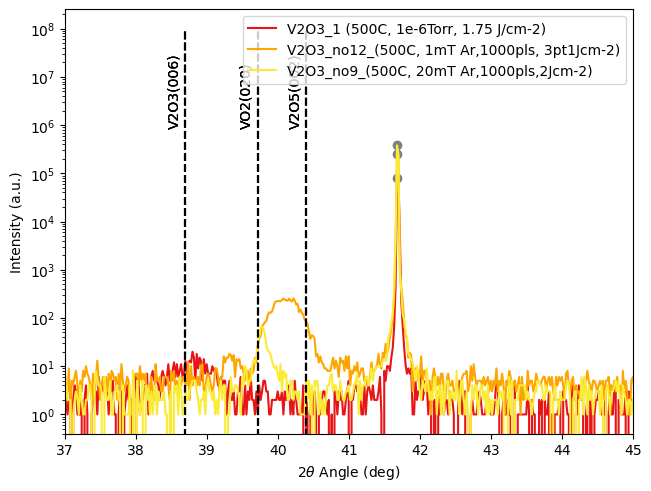

In [35]:
list1= file_list_maker("V2O3_no1_(500C, 9e-7Torr,1000pls,Al2O3,1pt75Jcm-2)_2th-w_correctwide.csv", "V2O3_no12_(500C, 1mT Ar,1000pls,Al2O3,3pt1Jcm-2)_2th-w_wide.csv", "V2O3_no9_(500C, 20mT Ar,1000pls,Al2O3,2Jcm-2)_2th-w_narrow.csv")
list2=file_list_maker('V2O3_1 (500C, 1e-6Torr, 1.75 J/cm-2)', 'V2O3_no12_(500C, 1mT Ar,1000pls, 3pt1Jcm-2)', "V2O3_no9_(500C, 20mT Ar,1000pls,2Jcm-2)")
litpeak = [39.717, 38.7, 40.4]
litpeaklabel= ['VO2(020)', 'V2O3(006)', 'V2O5(002)']
peakheight=600
prom=15

litpeak2 = [81.172, 83.096]
litpeaklabel2 = ['V7O3(422)', 'V3O5(800)']

xrd_multi_plot(list1, list2, litpeak,litpeaklabel, peakheight, prom, 'test', 37, 45, 'short')

['Cr2O3_60 (2 J/cm-2, 4K pls)', 'Cr2O3_61 (1.65 J/cm-2, 2K pls)']
Peak position(s):
Cr2O3_060_(600C,4000pls.P20mT,fluence2,STO111+1pt5KplsLSMO)_2th-w.csv
747     39.96
768     40.38
3060    86.22
Name: Angle, dtype: float64
Peak position(s):
Cr2O3_061_(600C,2000pls.P20mT,fluence1pt7,STO111+1pt5KplsLSMO)_2th-w.csv
222    39.96
241    40.34
Name: Angle, dtype: float64


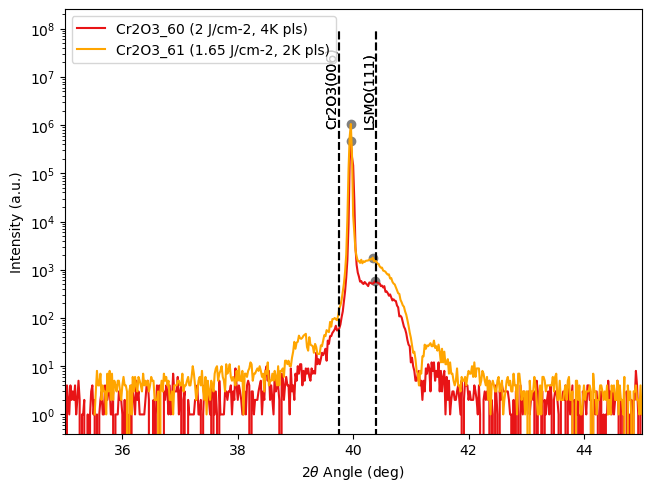

In [19]:
list1= file_list_maker( "Cr2O3_060_(600C,4000pls.P20mT,fluence2,STO111+1pt5KplsLSMO)_2th-w.csv", "Cr2O3_061_(600C,2000pls.P20mT,fluence1pt7,STO111+1pt5KplsLSMO)_2th-w.csv")
list2=file_list_maker('Cr2O3_60 (2 J/cm-2, 4K pls)', 'Cr2O3_61 (1.65 J/cm-2, 2K pls)')
print(list2)
litpeakfull = [ 39.75, 40.4]
litpeaklabelfull= [ 'Cr2O3(006)', 'LSMO(111)']
peakheight=500
prom=15

xrd_multi_plot(list1, list2, litpeakfull, litpeaklabelfull, peakheight, prom, 'test', 35,45, 'short')

['Cr2O3_61 (1.7 J/cm-2, 2K pls, ~23nm thick)']
Peak position(s):
Cr2O3_061_(600C,2000pls.P20mT,fluence1pt7,STO111+1pt5KplsLSMO)_2th-w.csv
222    39.96
241    40.34
Name: Angle, dtype: float64


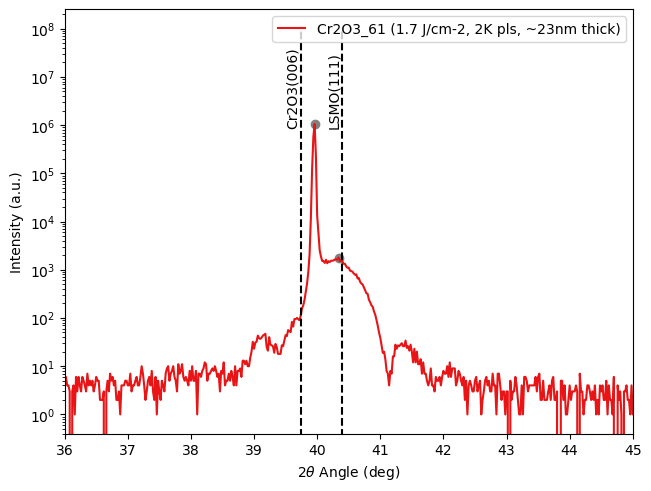

In [20]:
list1= file_list_maker("Cr2O3_061_(600C,2000pls.P20mT,fluence1pt7,STO111+1pt5KplsLSMO)_2th-w.csv")
list2=file_list_maker('Cr2O3_61 (1.7 J/cm-2, 2K pls, ~23nm thick)')
print(list2)
litpeakfull = [ 39.75, 40.4]
litpeaklabelfull= [ 'Cr2O3(006)', 'LSMO(111)']
peakheight=500
prom=15

xrd_multi_plot(list1, list2, litpeakfull, litpeaklabelfull, peakheight, prom, 'test', 36,45, 'short')